In [48]:
import pandas as pd
import matplotlib.pyplot as plt

- Download and compile [HypoDD](https://www.ldeo.columbia.edu/~felixw/hypoDD.html)
- Download test files from [Zhu et al. (2021)](https://arxiv.org/abs/2109.09008)
```bash
curl -O -J -L https://osf.io/aw53b/download
curl -O -J -L https://osf.io/y879e/download
```
- Convert GaMMA catalog and run HypoDD relocation
```
python gamma2hypodd.py
```

In [49]:
# catalog_hypoinverse = pd.read_csv("catOut.sum", sep="\s+")
catalog_hypoDD = pd.read_csv("hypoDD_catalog.txt", sep="\s+", names=["ID", "LAT", "LON", "DEPTH", "X", "Y", "Z", "EX", "EY", "EZ", "YR", "MO", "DY", "HR", "MI", "SC", "MAG", "NCCP", "NCCS", "NCTP",
"NCTS", "RCC", "RCT", "CID"])
catalog_gamma = pd.read_csv("gamma_catalog.csv", sep="\t")

In [50]:
# catalog_hypoinverse_selected = catalog_hypoinverse[catalog_hypoinverse["RMS"] < 1.0]
catalog_gamma["sigma"] = catalog_gamma["covariance"].apply(lambda x: float(x.split(",")[0]))
catalog_gamma_selected = catalog_gamma[catalog_gamma["sigma"] < 0.5]

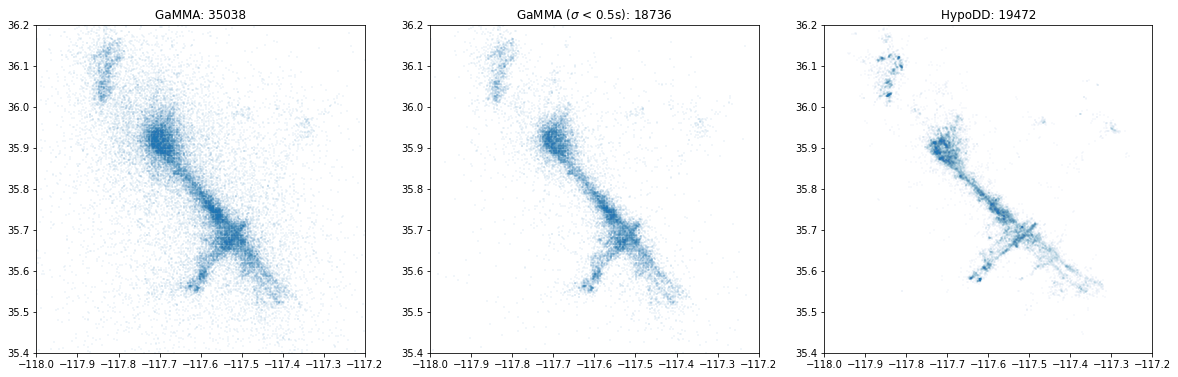

In [51]:
plt.figure(figsize=(20, 10))
size = 1.0
alpha = 0.05

plt.subplot(131)
plt.scatter( catalog_gamma["longitude"], catalog_gamma["latitude"], s=size, alpha=alpha, marker=",")
plt.title(f"GaMMA: {len(catalog_gamma)}")
plt.axis("scaled")
plt.xlim([-118, -117.2])
plt.ylim([35.4, 36.2])

plt.subplot(132)
plt.scatter(catalog_gamma_selected["longitude"], catalog_gamma_selected["latitude"], s=size, alpha=alpha, marker=",")
plt.title(f"GaMMA ($\sigma$ < 0.5s): {len(catalog_gamma_selected)}")
plt.axis("scaled")
plt.xlim([-118, -117.2])
plt.ylim([35.4, 36.2])

plt.subplot(133)
plt.scatter(catalog_hypoDD["LON"], catalog_hypoDD["LAT"], s=size, alpha=alpha/2, marker=",")
plt.title(f"HypoDD: {len(catalog_hypoDD)}")
plt.axis("scaled")
plt.xlim([-118, -117.2])
plt.ylim([35.4, 36.2])

plt.show()